<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">LAB 2</div><br/>
<div style="font-size: 18pt;">- Linear regression - economist approach</div><br/>
<div style="font-size: 18pt;">- Linear regression - gradient descent, ML approach</div><br/>



<div style="font-size: 14pt;">Exercise 1</div>
Estimate linear regression model for the wine data from Lecture 2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [5]:
import statsmodels.api as sm
import pandas as pd

In [6]:
os.getcwd()

'/Users/nindaba/Documents/vistula/semister-5/ai/general-info'

In [7]:
#load data
wine = pd.read_csv('Lab_2_data/wine.csv')

In [8]:
wine

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805
5,1959,8.0757,485,17.4833,187,24,46128.638
6,1960,6.5188,763,16.4167,290,23,46583.995
7,1961,8.4937,830,17.3333,38,22,47128.005
8,1962,7.3880,697,16.3000,52,21,48088.673
9,1963,6.7127,608,15.7167,155,20,48798.990


In [9]:
#check for multicollinearity
wine.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


In [10]:
Price = wine['Price']

In [11]:
Price

0     7.4950
1     8.0393
2     7.6858
3     6.9845
4     6.7772
5     8.0757
6     6.5188
7     8.4937
8     7.3880
9     6.7127
10    7.3094
11    6.2518
12    7.7443
13    6.8398
14    6.2435
15    6.3459
16    7.5883
17    7.1934
18    6.2049
19    6.6367
20    6.2941
21    7.2920
22    7.1211
23    6.2587
24    7.1860
Name: Price, dtype: float64

In [12]:
X = wine.drop(['FrancePop', 'Year', 'Price'], axis=1)

In [13]:
X

,WinterRain,AGST,HarvestRain,Age
0,600,17.1167,160,31
1,690,16.7333,80,30
2,502,17.1500,130,28
3,420,16.1333,110,26
4,582,16.4167,187,25
5,485,17.4833,187,24
6,763,16.4167,290,23
7,830,17.3333,38,22
8,697,16.3000,52,21
9,608,15.7167,155,20


In [18]:
pd.concat([X,X])

,WinterRain,AGST,HarvestRain,Age
0,600,17.1167,160,31
1,690,16.7333,80,30
2,502,17.1500,130,28
3,420,16.1333,110,26
4,582,16.4167,187,25
5,485,17.4833,187,24
6,763,16.4167,290,23
7,830,17.3333,38,22
8,697,16.3000,52,21
9,608,15.7167,155,20


In [21]:
mod = sm.OLS(Price, X)
result = mod.fit()

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.04e-07
Time:                        21:42:32   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4300      1.766     -1.942      0.066      -7.114       0.254
WinterRain      0.0011      0.001      2.120      0.047    1.73e-05       0.002
AGST            0.6072      0.099      6.152      0.000       0.401       0.813
HarvestRain    -0.0040      0.001     -4.652      0.000      -0.006      -0.002
Age             0.0239      0.008      2.956      0.008       0.007       0.041
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   2.797
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                1.041
Skew:                           0.034   Prob(JB):                        0.594
Kurtosis:                       2.003   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div style="font-size: 14pt;">Exercise 2</div>
Estimate linear regression model for the sample data set
`ex1-data.npz` $X \in \mathbb R^{1000\times 1}, Y \in \mathbb R^{1000}$<br/>
Implement linear regression as gradient descent algorithm.


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from time import sleep

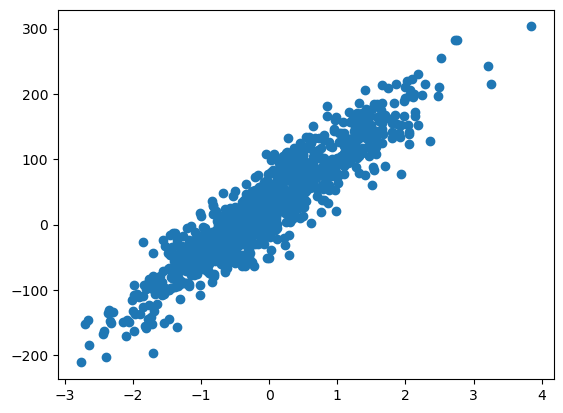

X.shape = (1000, 1), Y.shape = (1000,)


In [24]:
data = np.load('Lab_2_data/ex1-data.npz')
X, Y = data['X'], data['Y']

plt.scatter(X, Y);
plt.show()
print('X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

In [15]:
type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

In [31]:
Y = Y.reshape(-1,1)
Y.shape

(1000, 1)

What is the fit intercept


In [32]:
regr = LinearRegression(fit_intercept=True)

In [33]:
regr.fit(X, Y)
#regr.predict(X)
Ypred = regr.predict(X)

In [34]:
Ypred

array([[ 3.78977875e+01],
       [ 1.20126582e+02],
       [-1.29280377e+01],
       [ 1.53707431e+02],
       [ 1.77737776e+02],
       [-2.32753410e+01],
       [ 3.17347007e+02],
       [ 5.92614676e+01],
       [-5.94054886e+00],
       [ 1.66520830e+02],
       [ 2.84312276e+01],
       [-8.12068838e+01],
       [ 2.88015934e+01],
       [ 7.56191176e+01],
       [ 1.53001759e+02],
       [ 2.72782137e+02],
       [ 2.47111061e+01],
       [-8.66960894e+01],
       [-8.47882064e+01],
       [ 1.63488928e+01],
       [ 5.00938409e+01],
       [ 5.23730956e+01],
       [-8.09674406e+01],
       [ 8.66959093e+01],
       [ 6.74511031e+01],
       [ 2.02374424e+01],
       [ 3.16679144e+01],
       [-1.11233422e+01],
       [-2.36939666e+01],
       [-2.89348089e+01],
       [ 1.04484452e+01],
       [ 5.21744074e+01],
       [ 5.94403972e+01],
       [-1.17779660e+01],
       [ 1.96440878e+01],
       [ 1.54940178e+02],
       [ 3.90720096e+01],
       [ 7.21403342e+01],
       [ 6.1

In [37]:
regr.score(X, Y) #returns R2

0.8618037562353882

In [38]:
regr.intercept_, regr.coef_

(array([29.47250139]), array([[74.82900637]]))

Machine learning approach, linear regression using gradient descent

In [39]:
alpha = 0.01 #learning rate
n = 1000 #number of observations
Ymean = Y.mean()
#initialize the parameters (recall TSS from Lecture 2)
a0 = Ymean
a1 = 1000000

In [40]:
Ymean

30.02821776679756

In [33]:
for epoch in range(2000):
    Ypred = a0 + a1*X
    error = Ypred - Y
    error_mean = Ymean - Y
    R2 = 1 - np.sum(error**2) / np.sum(error_mean**2)
    a0 = a0 - alpha * 2 * np.sum(error)/n 
    a1 = a1 - alpha * 2 * np.sum(error * X)/n
    if(epoch%100 == 0):
        print('Epoch {:3d},\t a0 = {:10.8f}, \t a1 = {:10.8f}, \t R2 = {:10.8f}'.format(epoch, a0, a1, R2))
        sleep(0.8)

Epoch   0,	 a0 = -118.50145175, 	 a1 = 979909.12787966, 	 R2 = -153895978.72042277
Epoch 100,	 a0 = -1950.52651614, 	 a1 = 128815.82417404, 	 R2 = -2656782.69445941
Epoch 200,	 a0 = -490.71833863, 	 a1 = 16994.10533425, 	 R2 = -45907.26936570
Epoch 300,	 a0 = -73.37350525, 	 a1 = 2298.89815081, 	 R2 = -793.16347058
Epoch 400,	 a0 = 11.38182737, 	 a1 = 367.25583134, 	 R2 = -12.88483020
Epoch 500,	 a0 = 26.48798853, 	 a1 = 113.28724200, 	 R2 = 0.62358219
Epoch 600,	 a0 = 28.99970765, 	 a1 = 79.88801574, 	 R2 = 0.85767145
Epoch 700,	 a0 = 29.39967093, 	 a1 = 75.49465694, 	 R2 = 0.86173200
Epoch 800,	 a0 = 29.46150977, 	 a1 = 74.91661210, 	 R2 = 0.86180251
Epoch 900,	 a0 = 29.47086824, 	 a1 = 74.84053890, 	 R2 = 0.86180373
Epoch 1000,	 a0 = 29.47226170, 	 a1 = 74.83052490, 	 R2 = 0.86180376
Epoch 1100,	 a0 = 29.47246656, 	 a1 = 74.82920637, 	 R2 = 0.86180376
Epoch 1200,	 a0 = 29.47249637, 	 a1 = 74.82903272, 	 R2 = 0.86180376
Epoch 1300,	 a0 = 29.47250067, 	 a1 = 74.82900984, 	 R2 = 0.8618